In [18]:
# Eric Messerich's Homework 3-30-2019
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(city_df, ride_df, on="city")

# Display the data table for preview
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [19]:
merge_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

## Bubble Plot of Ride Sharing Data

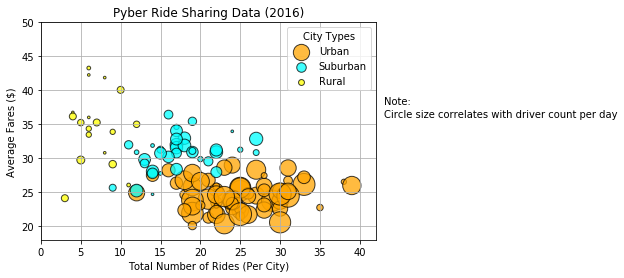

In [35]:
# Make groupings based off of type
urban_gp = merge_df.loc[merge_df["type"] == "Urban", :]
suburban_gp = merge_df.loc[merge_df["type"] == "Suburban", :]
rural_gp = merge_df.loc[merge_df["type"] == "Rural", :]

urban_cities = urban_gp.groupby("city")
suburban_cities = suburban_gp.groupby("city")
rural_cities = rural_gp.groupby("city")

# Obtain the x and y coordinates for each of the three city types
# (Worked with Amber Billings on this portion)
x_urban = urban_cities["ride_id"].count()
x_suburban = suburban_cities["ride_id"].count()
x_rural = rural_cities["ride_id"].count()

y_urban = urban_cities['fare'].mean()
y_suburban = suburban_cities['fare'].mean()
y_rural = rural_cities['fare'].mean()

size_urban = urban_cities['driver_count'].mean() * 7
size_suburban = suburban_cities['driver_count'].mean() * 7
size_rural = rural_cities['driver_count'].mean() * 7

#x_axis_urban = np.arange(len(urban_gp))

# Build the scatter plots for each city types
urban_h = plt.scatter(x_urban, y_urban, marker="o", facecolors="orange", edgecolors="black", alpha=0.75, s=size_urban, label="Urban")
suburban_h = plt.scatter(x_suburban, y_suburban, marker="o", facecolors="cyan", edgecolors="black", alpha=0.75, s=size_suburban, label="Suburban")
rural_h = plt.scatter(x_rural, y_rural, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75, s=size_rural, label="Rural")

# Incorporate the other graph properties
plt.ylim(18,50)
plt.xlim(0,42)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.grid()

# Create a legend
plt.legend(handles=[urban_h, suburban_h, rural_h],title="City Types",loc="best")


# Incorporate a text label regarding circle size
plt.text(43,38,"Note:")
plt.text(43,36,"Circle size correlates with driver count per day")

# Save Figure
plt.savefig("../Images/Pyber.png")

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

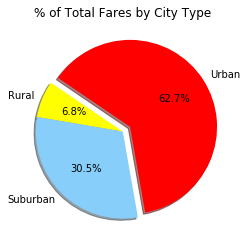

In [21]:
# Calculate Type Percents
urban_fare = urban_gp["fare"].sum()
suburban_fare = suburban_gp["fare"].sum()
rural_fare = rural_gp["fare"].sum()

total_fare = urban_fare + suburban_fare + rural_fare

urban_per = urban_fare / total_fare
suburban_per = suburban_fare / total_fare
rural_per = rural_fare / total_fare

fare_per = [urban_per, rural_per, suburban_per]
labels = ["Urban", "Rural", "Suburban"]
colors = ["red", "yellow", "lightskyblue"]
explode = [0.1,0,0]

# Build Pie Chart
plt.pie(fare_per, labels=labels, explode=explode, autopct="%1.1f%%", colors=colors, startangle=280, shadow=True)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/Total_fares_city.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

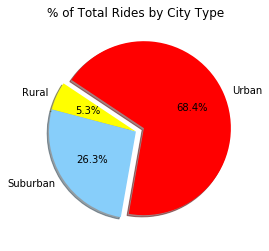

In [22]:
# Calculate Ride Percents
urban_ride = urban_gp["ride_id"].count()
suburban_ride = suburban_gp["ride_id"].count()
rural_ride = rural_gp["ride_id"].count()

total_ride = urban_ride + suburban_ride + rural_ride

urban_ride_per = urban_ride / total_ride
suburban_ride_per = suburban_ride / total_ride
rural_ride_per = rural_ride / total_ride

fare_ride_per = [urban_ride_per, rural_ride_per, suburban_ride_per]
labels = ["Urban", "Rural", "Suburban"]
colors = ["red", "yellow", "lightskyblue"]
explode = [0.1,0,0]

# Build Pie Chart
plt.pie(fare_ride_per, labels=labels, explode=explode, autopct="%1.1f%%", colors=colors, startangle=260, shadow=True)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Images/Total_rides_city.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

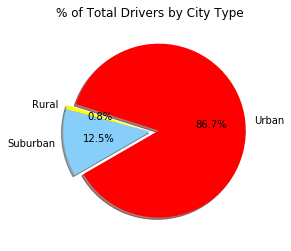

In [29]:
# Calculate Ride Percents
urban_drivers = urban_gp["driver_count"].sum()
suburban_drivers = suburban_gp["driver_count"].sum()
rural_drivers = rural_gp["driver_count"].sum()

total_drivers = urban_drivers + suburban_drivers + rural_drivers

urban_drivers_per = urban_drivers / total_drivers
suburban_drivers_per = suburban_drivers / total_drivers
rural_drivers_per = rural_drivers / total_drivers

fare_drivers_per = [urban_drivers_per, rural_drivers_per, suburban_drivers_per]
labels = ["Urban", "Rural", "Suburban"]
colors = ["red", "yellow", "lightskyblue"]
explode = [0.1,0,0]

# Build Pie Chart
plt.pie(fare_drivers_per, labels=labels, explode=explode, autopct="%1.1f%%", colors=colors, startangle=210, shadow=True)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/Total_drivers_city.png")

In [30]:
# Show Figure
plt.show()